In [380]:
from Features import *
from model import *
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
import Visualization.prediction as prediction
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# ENG

## LoadDataset

In [ ]:
output = "english.csv"

In [ ]:
path = "EnglishDataSet/Fnt"

In [ ]:
Dataset = LoadDataset.CustomDataSet(output,path,label_encoder.label_ENG(),LoadDataset.preprocessing_pipeline)

In [ ]:
Dataset.get_num_classes()

62

In [ ]:
Dataset.data

,image,label,encoded_labels
0,Sample001/img001-00001.png,0,[1]
1,Sample001/img001-00002.png,0,[1]
2,Sample001/img001-00003.png,0,[1]
3,Sample001/img001-00004.png,0,[1]
4,Sample001/img001-00005.png,0,[1]
...,...,...,...
62987,Sample062/img062-01012.png,z,[62]
62988,Sample062/img062-01013.png,z,[62]
62989,Sample062/img062-01014.png,z,[62]
62990,Sample062/img062-01015.png,z,[62]


## Split Dataset (Train 70% Validata 20% test 10%)

In [ ]:
train_ENG,val_ENG,Test_ENG = LoadDataset.load_split(Dataset,64)

## plot input image

torch.Size([64, 1, 32, 128])
torch.Size([64, 1])
torch.Size([64])


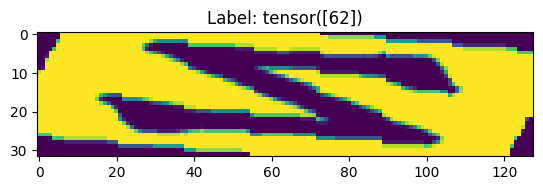

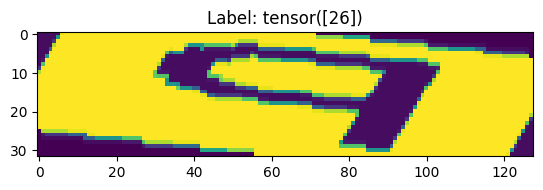

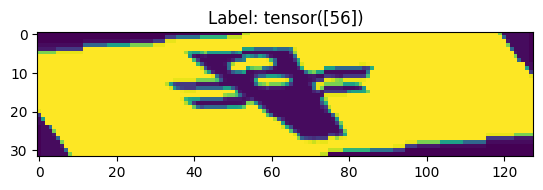

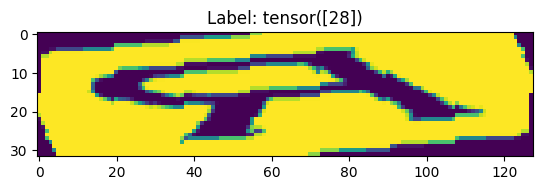

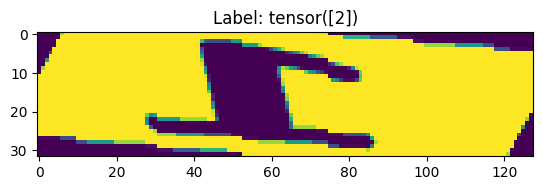

In [ ]:
for batch in train_ENG:
    images, labels,length = batch
    print(images.shape)  # Print the shape of the batch of images
    print(labels.shape)  # Print the shape of the batch of labels
    print(length.shape)
    
    # Visualize the first few images and their labels
    for i in range(5):  # Change the range to visualize more or fewer images
        plt.imshow(images[i].permute(1, 2, 0))  # Assuming images are in (C, H, W) format
        plt.title(f'Label: {labels[i]}')
        plt.show()
    break

## Select Device

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda


## Initialize Model

In [ ]:
model = Model.OCRModel(Dataset.get_num_classes()+1).to(device)
criterion = Model.criterion(blank=0,zero_infinity=True)
num_epochs = 50

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=1e-4)
# Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)

e:\CODE\Image Processing\Image-Processing-Project-\env\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


## Train model

In [ ]:
train_losses,val_losses,train_accuracies, val_accuracies = train_with_val.train_and_validate(model,criterion,optimizer,scheduler,train_ENG,val_ENG,num_epochs,device)

## Plot Accuracy and Loss

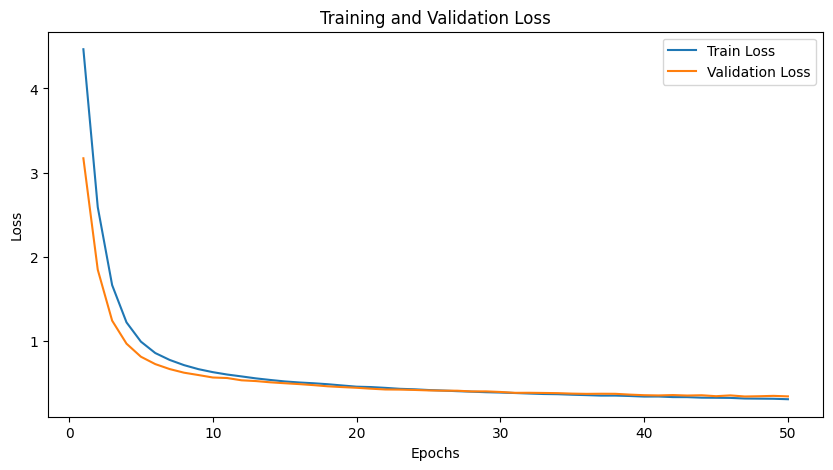

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


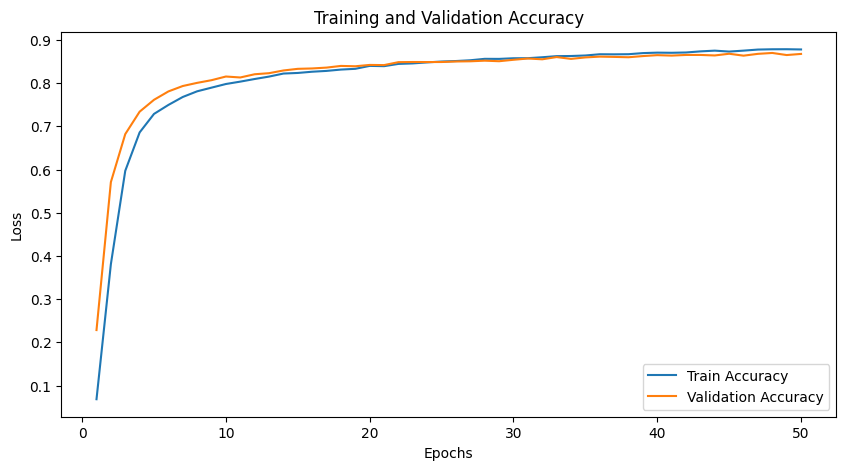

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1,num_epochs + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

## test model

In [ ]:
test.test(model,Test_ENG,criterion,device)

Test Loss: 0.3141
 Accuracy: 87.68%


## save model

In [ ]:
torch.save(model.state_dict(), 'ENGOCR.pth')
print('Model saved successfully.')

Model saved successfully.


## predict Images

e:\CODE\Image Processing\Image-Processing-Project-\Visualization\prediction.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return image


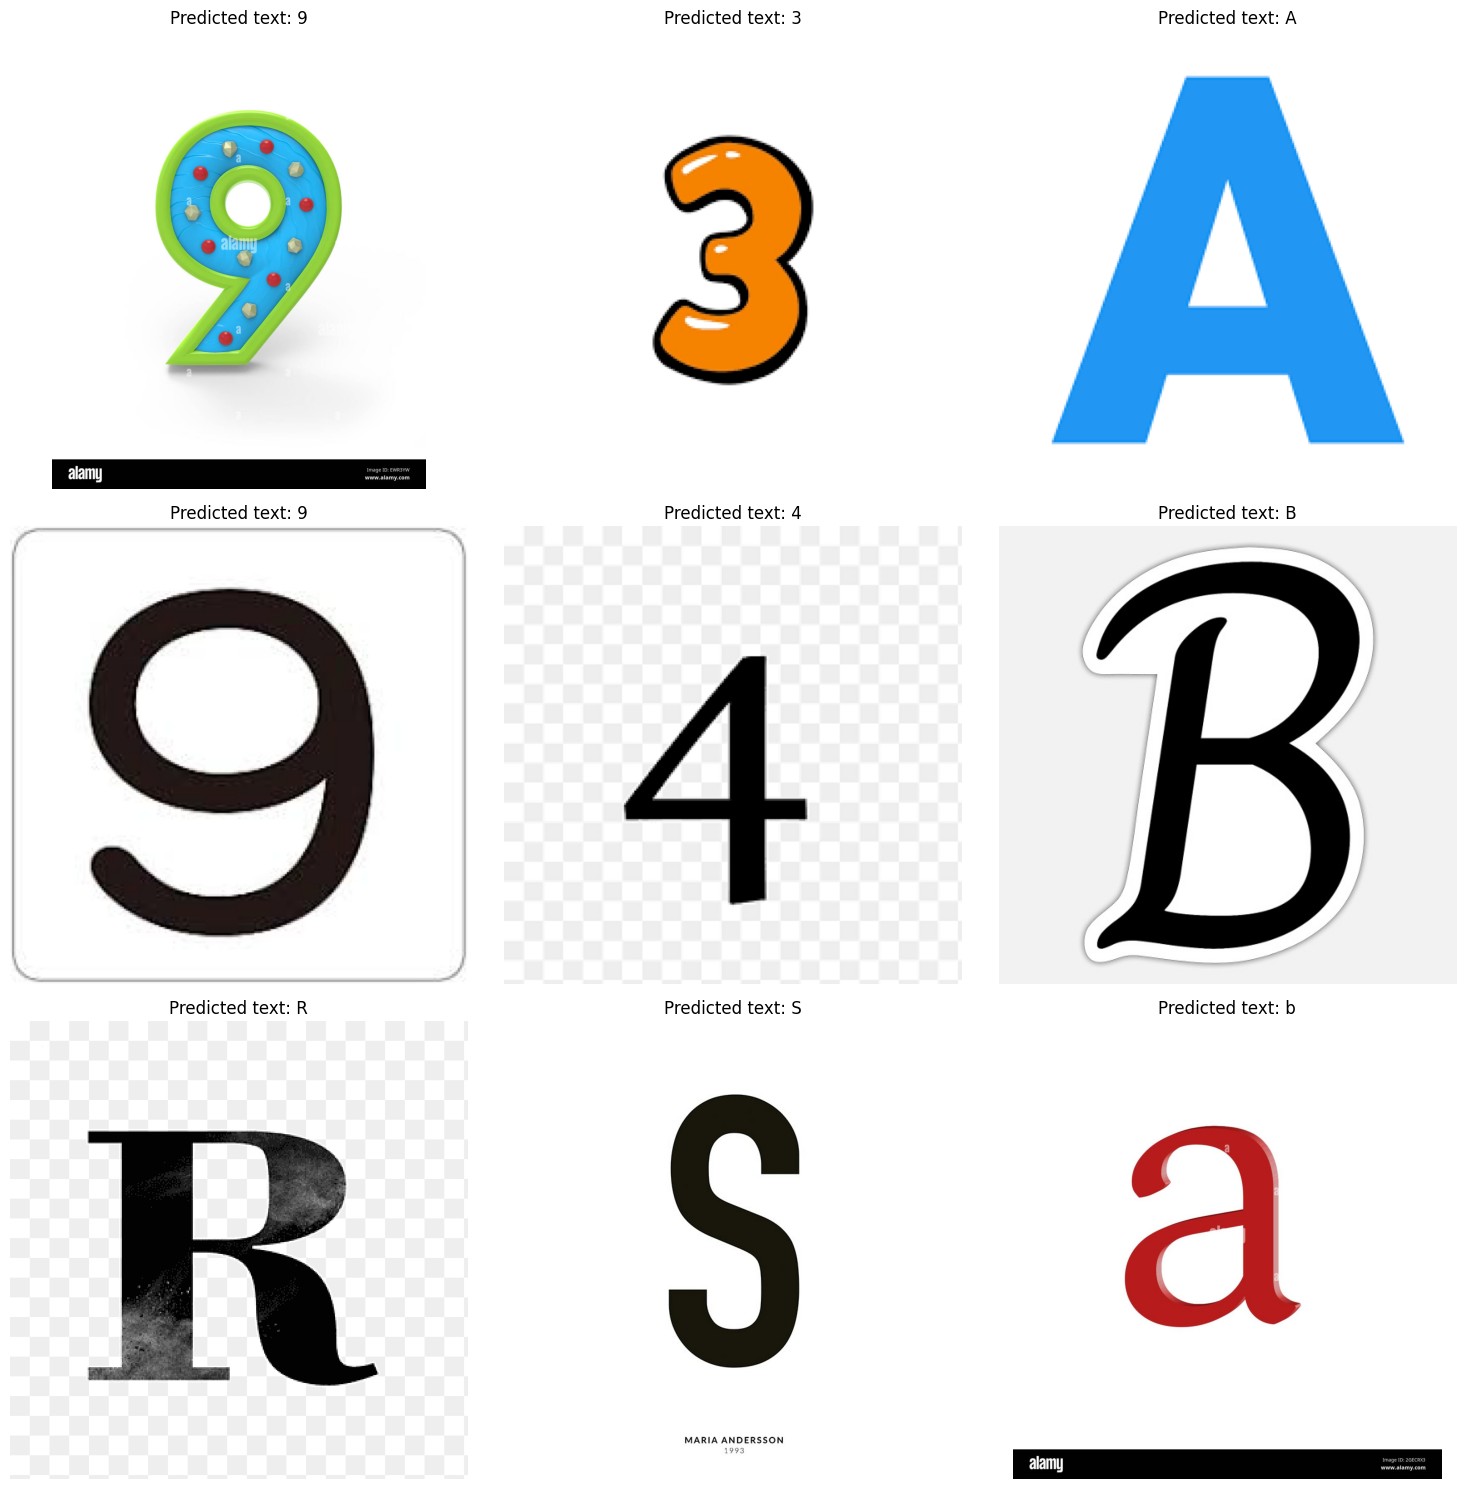

In [ ]:
prediction.predict_and_plot("ENGOCR.pth",Dataset.get_num_classes()+1,device,"SampleENG",LoadDataset.preprocessing_pipeline,label_encoder.label_ENG())

# Thai

## LoadDataset

In [433]:
Thai= "thai_dataset.csv"

In [440]:
path_thai = ""

In [441]:
Dataset_thai = LoadDataset.CustomDataSet(Thai,path_thai,label_encoder.label_thai(),LoadDataset.preprocessing_pipeline)

In [442]:
Dataset_thai.get_num_classes()

44

In [443]:
Dataset_thai.data

,image,label,encoded_labels
0,ThaiDataset\ก01\01-001.jpg,ก,[1]
1,ThaiDataset\ก01\01-002.jpg,ก,[1]
2,ThaiDataset\ก01\01-003.jpg,ก,[1]
3,ThaiDataset\ก01\01-004.jpg,ก,[1]
4,ThaiDataset\ก01\01-005.jpg,ก,[1]
...,...,...,...
1019,ThaiDataset\ฮ44\44-022.jpg,ฮ,[46]
1020,ThaiDataset\ฮ44\44-023.jpg,ฮ,[46]
1021,ThaiDataset\ฮ44\44-024.jpg,ฮ,[46]
1022,ThaiDataset\ฮ44\44-025.jpg,ฮ,[46]


## Split Dataset (Train 70% Validata 20% test 10%)

In [453]:
train_Thai,val_Thai,Test_Thai = LoadDataset.load_split(Dataset_thai,1)

## plot input image

torch.Size([1, 1, 32, 128])
torch.Size([1, 1])
torch.Size([1])


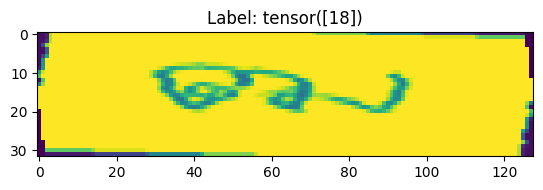

In [455]:
for batch in train_Thai:
    images, labels,length = batch
    print(images.shape)  # Print the shape of the batch of images
    print(labels.shape)  # Print the shape of the batch of labels
    print(length.shape)
    
    # Visualize the first few images and their labels
    for i in range(1):  # Change the range to visualize more or fewer images
        plt.imshow(images[i].permute(1, 2, 0))  # Assuming images are in (C, H, W) format
        plt.title(f'Label: {labels[i]}')
        plt.show()
    break

## Select Device

In [456]:
device_thai = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device_thai}')

Using device: cuda


## Initialize Model

In [457]:
model_thai = Model.OCRModel(Dataset_thai.get_num_classes()+1).to(device)
criterion_thai = Model.criterion(blank=0,zero_infinity=True)
num_epochs_thai = 200 

In [458]:
optimizer_thai = optim.Adam(model.parameters(), lr=1e-5)
# Learning rate scheduler
scheduler_thai = optim.lr_scheduler.ReduceLROnPlateau(optimizer_thai, mode='min', factor=0.1, patience=5, verbose=True)

e:\CODE\Image Processing\Image-Processing-Project-\env\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


## Train model

In [459]:
train_losses_thai,val_losses_thai,train_accuracies_thai, val_accuracies_thai = train_with_val.train_and_validate(model_thai,criterion_thai,optimizer_thai,scheduler_thai,train_Thai,val_Thai,num_epochs_thai,device_thai)

Epoch 1/200 [Validation]: 100%|██████████| 204/204 [00:01<00:00, 182.98it/s]


Epoch [1/200], Learning Rate: 0.000010
Epoch [1/200], Train Loss: 26.8658, Val Loss: 26.9908, Train Accuracy: 0.2263, Val Accuracy: 0.1471


Epoch 2/200 [Validation]: 100%|██████████| 204/204 [00:00<00:00, 225.74it/s]


Epoch [2/200], Learning Rate: 0.000010
Epoch [2/200], Train Loss: 26.8767, Val Loss: 26.9104, Train Accuracy: 0.1885, Val Accuracy: 0.1324


Epoch 3/200 [Validation]: 100%|██████████| 204/204 [00:00<00:00, 219.74it/s]


Epoch [3/200], Learning Rate: 0.000010
Epoch [3/200], Train Loss: 26.8941, Val Loss: 26.8421, Train Accuracy: 0.2011, Val Accuracy: 0.1373


Epoch 4/200 [Validation]: 100%|██████████| 204/204 [00:00<00:00, 223.42it/s]


Epoch [4/200], Learning Rate: 0.000010
Epoch [4/200], Train Loss: 26.8501, Val Loss: 26.8348, Train Accuracy: 0.1816, Val Accuracy: 0.1176


Epoch 5/200 [Validation]: 100%|██████████| 204/204 [00:00<00:00, 225.15it/s]


Epoch [5/200], Learning Rate: 0.000010
Epoch [5/200], Train Loss: 26.8570, Val Loss: 27.0035, Train Accuracy: 0.1704, Val Accuracy: 0.1912


Epoch 6/200 [Validation]: 100%|██████████| 204/204 [00:00<00:00, 212.66it/s]


Epoch [6/200], Learning Rate: 0.000010
Epoch [6/200], Train Loss: 26.8598, Val Loss: 26.8080, Train Accuracy: 0.1969, Val Accuracy: 0.1373


Epoch 7/200 [Validation]: 100%|██████████| 204/204 [00:00<00:00, 209.51it/s]


Epoch [7/200], Learning Rate: 0.000010
Epoch [7/200], Train Loss: 26.8834, Val Loss: 26.9477, Train Accuracy: 0.1816, Val Accuracy: 0.0686


Epoch 8/200 [Validation]: 100%|██████████| 204/204 [00:01<00:00, 174.52it/s]


Epoch [8/200], Learning Rate: 0.000010
Epoch [8/200], Train Loss: 26.8684, Val Loss: 26.8824, Train Accuracy: 0.2109, Val Accuracy: 0.1716


Epoch 9/200 [Validation]: 100%|██████████| 204/204 [00:00<00:00, 213.84it/s]


Epoch [9/200], Learning Rate: 0.000010
Epoch [9/200], Train Loss: 26.8838, Val Loss: 26.7951, Train Accuracy: 0.1844, Val Accuracy: 0.1569


Epoch 10/200 [Validation]: 100%|██████████| 204/204 [00:00<00:00, 212.24it/s]


Epoch [10/200], Learning Rate: 0.000010
Epoch [10/200], Train Loss: 26.8241, Val Loss: 26.8055, Train Accuracy: 0.1732, Val Accuracy: 0.1520


Epoch 11/200 [Validation]: 100%|██████████| 204/204 [00:00<00:00, 217.51it/s]


Epoch [11/200], Learning Rate: 0.000010
Epoch [11/200], Train Loss: 26.8812, Val Loss: 26.8215, Train Accuracy: 0.1564, Val Accuracy: 0.1520


Epoch 12/200 [Validation]: 100%|██████████| 204/204 [00:00<00:00, 221.05it/s]


Epoch [12/200], Learning Rate: 0.000010
Epoch [12/200], Train Loss: 26.8964, Val Loss: 26.7698, Train Accuracy: 0.1760, Val Accuracy: 0.1667


Epoch 13/200 [Validation]: 100%|██████████| 204/204 [00:00<00:00, 211.20it/s]


Epoch [13/200], Learning Rate: 0.000010
Epoch [13/200], Train Loss: 26.8791, Val Loss: 26.9136, Train Accuracy: 0.1899, Val Accuracy: 0.2353


Epoch 14/200 [Validation]: 100%|██████████| 204/204 [00:00<00:00, 209.75it/s]


Epoch [14/200], Learning Rate: 0.000010
Epoch [14/200], Train Loss: 26.8651, Val Loss: 26.8029, Train Accuracy: 0.1844, Val Accuracy: 0.1716


Epoch 15/200 [Validation]: 100%|██████████| 204/204 [00:00<00:00, 220.42it/s]


Epoch [15/200], Learning Rate: 0.000010
Epoch [15/200], Train Loss: 26.8797, Val Loss: 26.7841, Train Accuracy: 0.1788, Val Accuracy: 0.1422


Epoch 16/200 [Validation]: 100%|██████████| 204/204 [00:00<00:00, 213.67it/s]


Epoch [16/200], Learning Rate: 0.000010
Epoch [16/200], Train Loss: 26.8771, Val Loss: 26.8677, Train Accuracy: 0.1592, Val Accuracy: 0.1618


Epoch 17/200 [Validation]: 100%|██████████| 204/204 [00:00<00:00, 215.64it/s]


Epoch [17/200], Learning Rate: 0.000010
Epoch [17/200], Train Loss: 26.8540, Val Loss: 26.7534, Train Accuracy: 0.2039, Val Accuracy: 0.1373


Epoch 18/200 [Validation]: 100%|██████████| 204/204 [00:00<00:00, 214.38it/s]


Epoch [18/200], Learning Rate: 0.000010
Epoch [18/200], Train Loss: 26.8657, Val Loss: 26.8713, Train Accuracy: 0.1536, Val Accuracy: 0.1667


Epoch 19/200 [Validation]: 100%|██████████| 204/204 [00:00<00:00, 213.10it/s]


Epoch [19/200], Learning Rate: 0.000010
Epoch [19/200], Train Loss: 26.8619, Val Loss: 26.8459, Train Accuracy: 0.1899, Val Accuracy: 0.1373


Epoch 20/200 [Validation]: 100%|██████████| 204/204 [00:00<00:00, 217.80it/s]


Epoch [20/200], Learning Rate: 0.000010
Epoch [20/200], Train Loss: 26.8630, Val Loss: 26.8861, Train Accuracy: 0.2011, Val Accuracy: 0.1520


Epoch 21/200 [Validation]: 100%|██████████| 204/204 [00:00<00:00, 215.00it/s]


Epoch [21/200], Learning Rate: 0.000010
Epoch [21/200], Train Loss: 26.8734, Val Loss: 26.8876, Train Accuracy: 0.1830, Val Accuracy: 0.1127


Epoch 22/200 [Validation]: 100%|██████████| 204/204 [00:00<00:00, 216.37it/s]

Epoch [22/200], Learning Rate: 0.000010
Epoch [22/200], Train Loss: 26.8876, Val Loss: 26.7968, Train Accuracy: 0.1788, Val Accuracy: 0.1520
Early stopping triggered


## Plot Accuracy and Loss

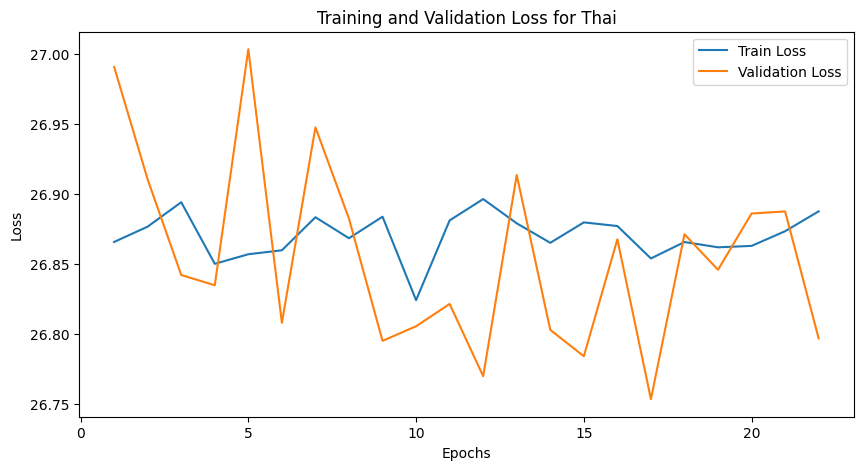

In [471]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 22 + 1), train_losses_thai, label='Train Loss')
plt.plot(range(1, 22 + 1), val_losses_thai, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss for Thai')
plt.show()


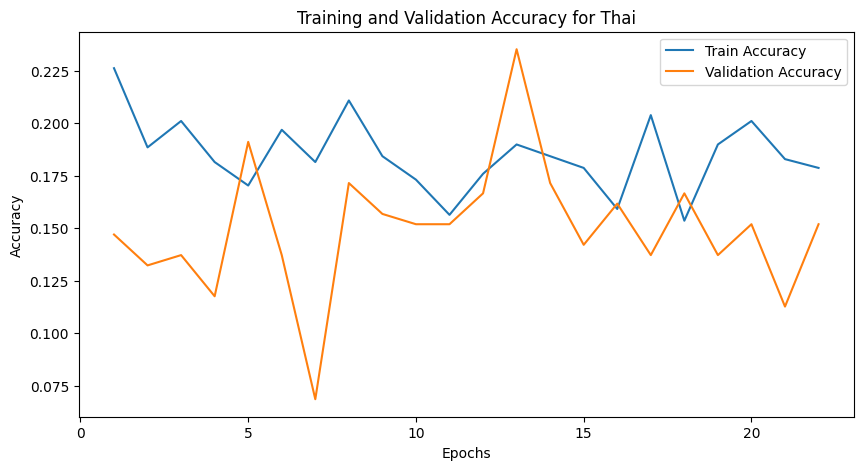

In [474]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 22 + 1), train_accuracies_thai, label='Train Accuracy')
plt.plot(range(1,22 + 1), val_accuracies_thai, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy for Thai')
plt.show()

## test model

In [476]:
test.test(model_thai,Test_Thai,criterion_thai,device_thai)

Test Loss: 26.8229
 Accuracy: 24.04%


## save model

In [477]:
torch.save(model_thai.state_dict(), 'ThaiOCR.pth')
print('Model saved successfully.')

Model saved successfully.


## predict Images

e:\CODE\Image Processing\Image-Processing-Project-\Visualization\prediction.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path)

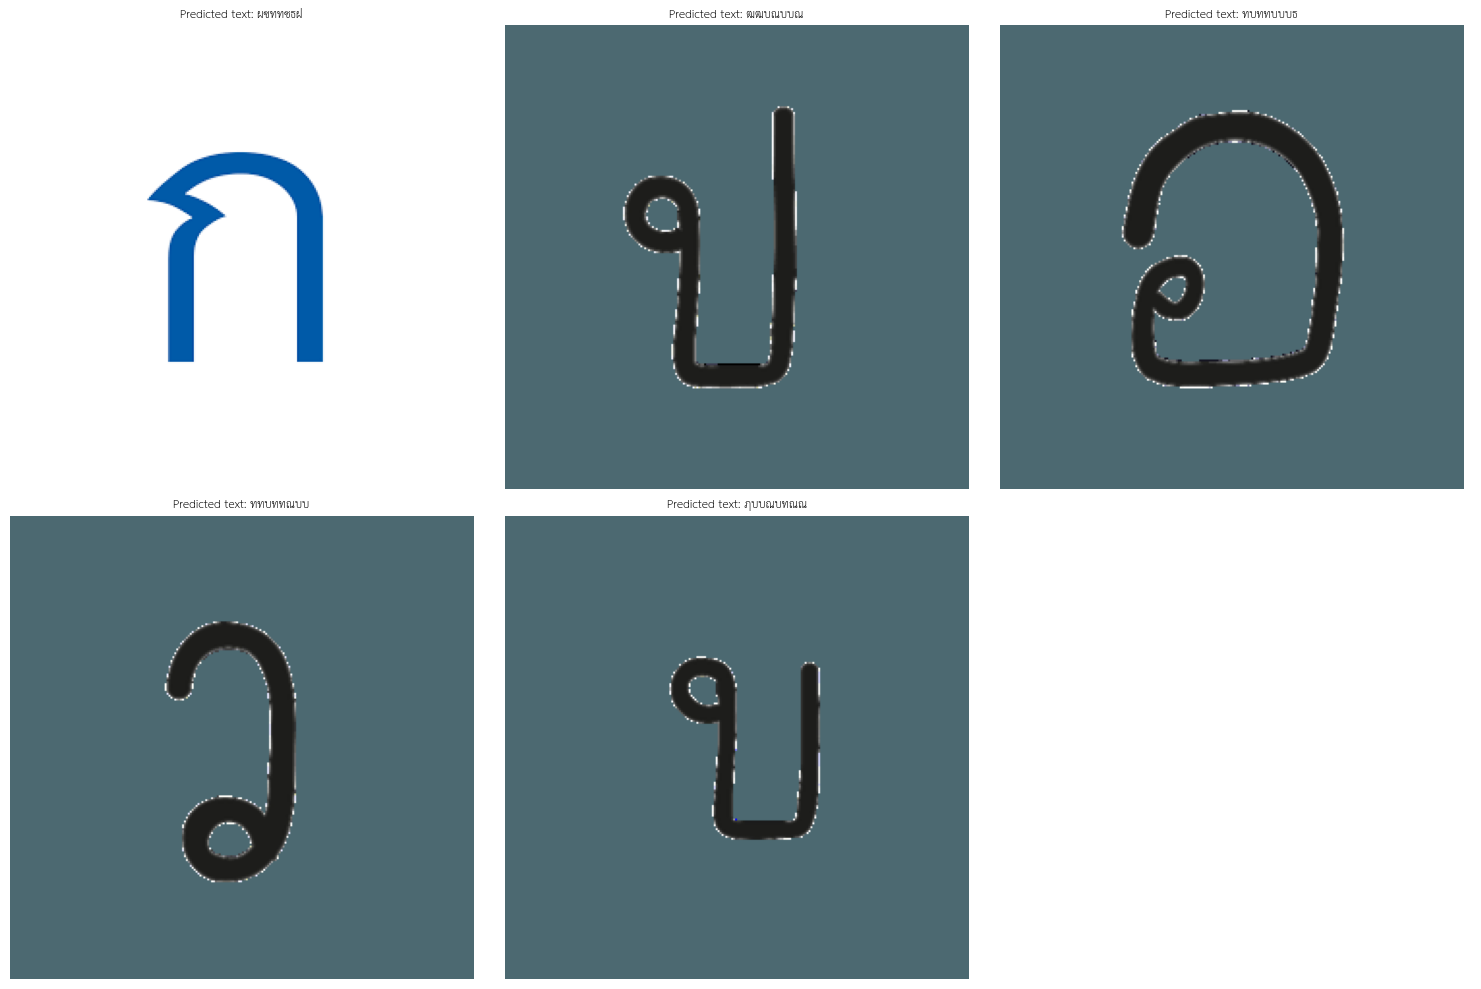

In [483]:
prediction.predict_and_plot("ThaiOCR.pth",Dataset_thai.get_num_classes()+1,device,"SampleThai",LoadDataset.preprocessing_pipeline,label_encoder.label_thai())